# **Proyek Analitik Prediktif : Kumpulan Data Prediksi Gagal Jantung**

* Nama : Moh. Aflah Azzaky
* Email : aflahazzaki123@gmail.com
* ID Dicoding : aflahazzaky
* Dataset : [Heart Failure Prediction Dataset](https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction)

# **Data Understanding**

Data pada project ini menggunakan data yang bersumber pada sebuah situs kaggle, dimana fokus pada data tersebut menjelaskan faktor-faktor yang akan mempengaruhi sebuah penyakit gagal jantung.[[Kaggle Dataset - Heart Failure Prediction Dataset](https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction)]

Pada berkas yang diunduh yakni heart.csv berisi 918 rows x 12 columns. Kolom-kolom tersebut berisi diantaranya 1 kolom berisi tipe data `float64`, 6 kolom berisi tipe data `int64`, dan 5 kolom berisi tipe data `object`. Untuk penjelasan mengenai variabel dapat dilihat sebagai berikut:
1. **Age**: usia pasien dalam jumlah tahun dengan tipe data `int64`
2. **Sex**: jenis kelamin pasien dengan kategori M = Male/Pria dan F = Female/Perempuan dengan tipe data object
3. **ChestPainType**: jenis nyeri dada dengan kategori TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic dengan tipe data object
   - *Typical Angina* adalah nyeri dada yang disebabkan oleh aktivitas fisik atau stres emosional, dan berkurang saat istirahat atau mengonsumsi nitrogliserin.
   - *Atypical Angina* adalah nyeri dada yang tidak memenuhi kriteria angina tipikal, tetapi sesuai dengan penyebab iskemik jantung.
   - *Non-Anginal Pain* adalah nyeri dada yang tidak disebabkan oleh penyakit jantung.
   - *Asymptomatic* adalah istilah yang menggambarkan kondisi seseorang yang menderita penyakit, tetapi tidak menunjukkan gejala klinis apa pun.
4. **RestingBP**: tekanan darah istirahat dengan tipe data `int64`.
5. **Cholesterol**: kolesterol serum dengan tipe data `int64`.
6. **FastingBS**: gula darah puasa dengan tipe data `int64`.
7. **RestingECG**: hasil elektrokardiogram istirahat dengan kategori Normal, ST = Mengalami kelainan gelombang ST-T, LVH = menunjukkan kemungkinan atau pasti hipertrofi ventrikel kiri dengan tipe data `object`.
8. **MaxHR**: detak jantung maksimum tercapai dengan tipe data `int64` yang berisi nilai numerik antara 60 dan 202.
9. **ExerciseAngina**: angina akibat olahraga dengan kategori Y = Yes/Iya & N = No/Tidak bertipe data `object`.
10. **Oldpeak**: puncak tua nilai numerik yang diukur pada depresi bertipe data `float64`.
11. **ST_Slope**: kemiringan segmen ST terhadap denyut jantung (heart rate) yang dihitung dengan linear regression dengan kategori Up: upsloping, Flat: flat, Down: downsloping bertipe data `object`.
12. **HeartDisease**: penyakit jantung dengan hasil keluaran 1 = penyakit jantung dan 0 = normal bertipe data `int64`.

# **Data Loading**

## ***Install & Import Library***

* *Libray* Numpy digunakan untuk memproses larik atau array.
* *Libray* Matplotlib digunakan membuat visualisasi data dalam dua dimensi.
* *Libray* Seaborn dibangun di ata *library* Matplotlib, digunakan untuk membuat visualisasi data.
* *Libray* Pandas digunakan untuk menganalisis dan memanipulasi data.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

## ***Read Dataset From Kaggle***

1. Menginstall kaggle dan mengunduh dataset menggunakan *Command API Kaggle*.

In [2]:
!pip install kaggle

os.environ['KAGGLE_KEY'] = 'bb18e594229a6d36e6251ef61baea580'
os.environ['KAGGLE_USERNAME'] = 'aflahazzaky'

!kaggle datasets download -d fedesoriano/heart-failure-prediction
!unzip heart-failure-prediction.zip

Dataset URL: https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction
License(s): ODbL-1.0
  0% 0.00/8.56k [00:00<?, ?B/s]
100% 8.56k/8.56k [00:00<00:00, 12.6MB/s]
Archive:  heart-failure-prediction.zip
  inflating: heart.csv               


2. Membaca dataset yang telah terunduh dan tersimpan pada file local google colab.

In [3]:
url = '/content/heart.csv'
df = pd.read_csv(url)
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


# **Exploratory Data Analysis**

1. Mendeskripsikan variabel.

## ***Variable Description***

1. Usia: usia pasien [tahun]
2. Jenis Kelamin: jenis kelamin pasien [L: Laki-laki, P: Perempuan]
3. ChestPainType: tipe nyeri dada [TA: Angina Khas, ATA: Angina Atipikal, NAP: Nyeri Non-Anginal, ASY: Tanpa Gejala]
4. RestingBP: tekanan darah istirahat [mm Hg]
5. Kolesterol: kolesterol serum [mm/dl]
6. FastingBS: gula darah puasa [1: jika FastingBS > 120 mg/dl, 0: sebaliknya]
7. RestingECG: hasil elektrokardiogram istirahat [Normal: Normal, ST: mengalami kelainan gelombang ST-T (inversi gelombang T dan/atau elevasi atau depresi ST > 0,05 mV), LVH: menunjukkan kemungkinan atau pasti hipertrofi ventrikel kiri menurut kriteria Estes]
8. MaxHR: detak jantung maksimum tercapai [Nilai numerik antara 60 dan 202]
9. LatihanAngina: angina akibat olahraga [Y: Ya, N: Tidak]
10. Oldpeak: oldpeak = ST [Nilai numerik diukur dalam depresi]
11. ST_Slope : kemiringan puncak latihan segmen ST [Atas : menanjak, Datar : datar, Bawah : miring]
12. Penyakit Jantung: kelas keluaran [1: penyakit jantung, 0: Normal]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


2. Mendeskripsikan statistika dataset.

In [5]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


## ***Handling Missing Values ​​& Outliers***

1. Mengecek nilai 0 pada dataset.

In [6]:
RestingBP = (df.RestingBP == 0).sum()
Cholesterol = (df.Cholesterol == 0).sum()

print(f'Jumlah nilai 0 pada RestingBP: {RestingBP}')
print(f'Jumlah nilai 0 pada Cholesterol: {Cholesterol}')

Jumlah nilai 0 pada RestingBP: 1
Jumlah nilai 0 pada Cholesterol: 172


2. Mengecek data yang berisi nilai 0 pada dataset

In [7]:
df.loc[(df['RestingBP']==0)]
df.loc[(df['Cholesterol']==0)]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
293,65,M,ASY,115,0,0,Normal,93,Y,0.0,Flat,1
294,32,M,TA,95,0,1,Normal,127,N,0.7,Up,1
295,61,M,ASY,105,0,1,Normal,110,Y,1.5,Up,1
296,50,M,ASY,145,0,1,Normal,139,Y,0.7,Flat,1
297,57,M,ASY,110,0,1,ST,131,Y,1.4,Up,1
...,...,...,...,...,...,...,...,...,...,...,...,...
514,43,M,ASY,122,0,0,Normal,120,N,0.5,Up,1
515,63,M,NAP,130,0,1,ST,160,N,3.0,Flat,0
518,48,M,NAP,102,0,1,ST,110,Y,1.0,Down,1
535,56,M,ASY,130,0,0,LVH,122,Y,1.0,Flat,1


3. Menghapus baris data yang berisi nilai 0 pada dataset dengan ketentuan kolom yang dipilih.

In [8]:
df.drop(df.loc[(df['RestingBP']==0)].index, inplace=True)
df.drop(df.loc[(df['Cholesterol']==0)].index, inplace=True)
df.shape

(746, 12)

4. Mendeskripiskan statistik dataset.

In [9]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000
mean,52.882038,133.022788,244.635389,0.167560,140.226542,0.901609,0.477212
std,9.505888,17.282750,59.153524,0.373726,24.524107,1.072861,0.499816
min,28.000000,92.000000,85.000000,0.000000,69.000000,-0.100000,0.000000
25%,46.000000,120.000000,207.250000,0.000000,122.000000,0.000000,0.000000
50%,54.000000,130.000000,237.000000,0.000000,140.000000,0.500000,0.000000
75%,59.000000,140.000000,275.000000,0.000000,160.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


5. Menghapus kolom data yang tidak diperlukan.

In [10]:
df.drop(['FastingBS'], axis=1, inplace=True)
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,Normal,122,N,0.0,Up,0


6. Menampilkan outliers 'RestingBP'.

<Axes: xlabel='RestingBP'>

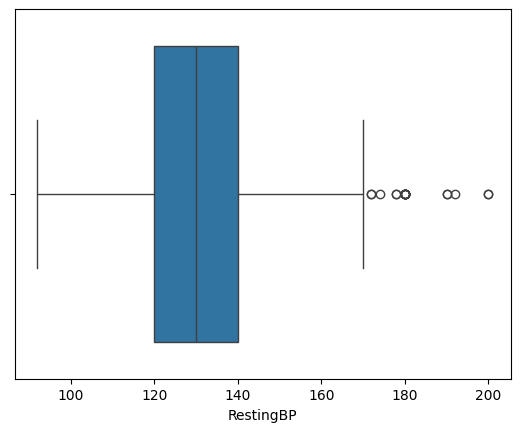

In [11]:
sns.boxplot(x=df['RestingBP'])

7. Menampilkan outliers 'Cholesterol'.

<Axes: xlabel='Cholesterol'>

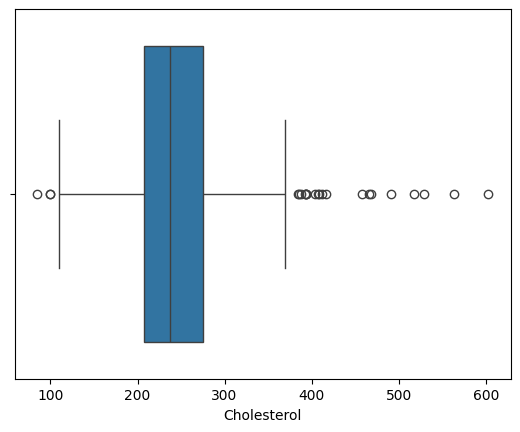

In [12]:
sns.boxplot(x=df['Cholesterol'])

8. Menampilkan outliers 'Oldpeak'.

<Axes: xlabel='Oldpeak'>

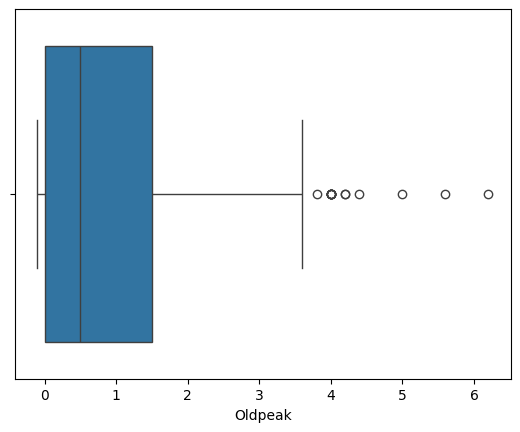

In [13]:
sns.boxplot(x=df['Oldpeak'])

Dari boxplot diatas, kita dapat mengidentifikasi **outliers** (pencilan) dalam data:

1. **Garis tengah kotak** menunjukkan **median** dari data `'RestingBP','Cholesterol', 'Oldpeak'`.
2. **Kotak** menunjukkan rentang dari **kuartil pertama (Q1)** hingga **kuartil ketiga (Q3)**, menggambarkan **interquartile range (IQR)**, yaitu rentang tengah 50% dari data.
3. **Garis-garis horizontal** (whiskers) yang keluar dari kotak menunjukkan rentang data di luar Q1 dan Q3, umumnya diperpanjang hingga 1,5 kali IQR dari kuartil terendah (Q1) dan tertinggi (Q3).
4. **Titik-titik** di luar whiskers adalah **outliers**. Titik-titik ini mewakili nilai yang berada di luar rentang 1,5 kali IQR dari Q1 dan Q3, menandakan nilai `'RestingBP','Cholesterol', 'Oldpeak'` yang jauh dari mayoritas data.

9. Membatasi nilai outliers.

In [14]:
df_numeric = df.select_dtypes(include=[np.number])
Q1 = df_numeric.quantile(0.25)
Q3 = df_numeric.quantile(0.75)
IQR=Q3-Q1
df_cleaned=df[~((df_numeric<(Q1-1.5*IQR))|(df_numeric>(Q3+1.5*IQR))).any(axis=1)]

# Cek ukuran dataset setelah kita drop outliers
df_cleaned.shape

(692, 11)

10. Menampilkan dataset yang telah dibersihkan.

In [15]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 692 entries, 0 to 917
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             692 non-null    int64  
 1   Sex             692 non-null    object 
 2   ChestPainType   692 non-null    object 
 3   RestingBP       692 non-null    int64  
 4   Cholesterol     692 non-null    int64  
 5   RestingECG      692 non-null    object 
 6   MaxHR           692 non-null    int64  
 7   ExerciseAngina  692 non-null    object 
 8   Oldpeak         692 non-null    float64
 9   ST_Slope        692 non-null    object 
 10  HeartDisease    692 non-null    int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 64.9+ KB


## ***Univariate Analysis***

1. Membagi 2 bagian yaitu data kategori dan numerik

In [16]:
categorical_features = df.select_dtypes(include=['object']).columns
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns

### Categorical Features

2. Menampilkan plot kategori

     jumlah sampel  persentase
Sex                           
M              527        76.2
F              165        23.8


<Axes: title={'center': 'Sex'}, xlabel='Sex'>

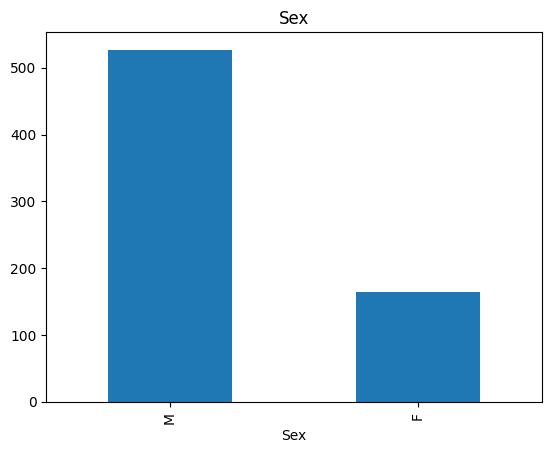

In [17]:
feature = categorical_features[0]
count = df_cleaned[feature].value_counts()
percent = 100*df_cleaned[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature)

* **Sex**: Kategori M memiliki jumlah sampel yang lebih tinggi dibandingkan kategori F.

               jumlah sampel  persentase
ChestPainType                           
ASY                      332        48.0
NAP                      163        23.6
ATA                      158        22.8
TA                        39         5.6


<Axes: title={'center': 'ChestPainType'}, xlabel='ChestPainType'>

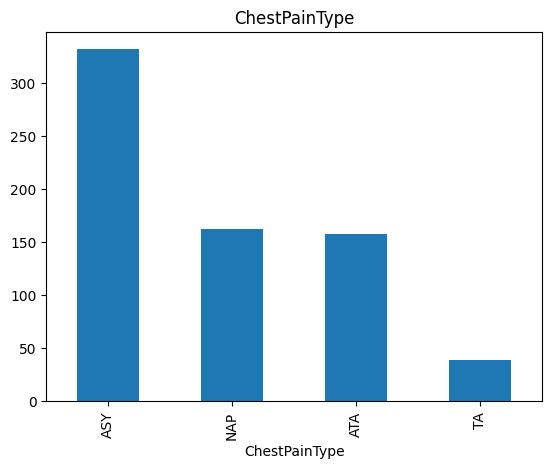

In [18]:
feature = categorical_features[1]
count = df_cleaned[feature].value_counts()
percent = 100*df_cleaned[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature)

* **ChestPainType**: Kategori ASY memiliki frekuensi tertinggi, diikuti oleh kategori NAP dan ATA, sedangkan kategori TA memiliki frekuensi paling rendah. Ini menunjukkan distribusi tipe nyeri dada yang dialami oleh pasien dalam dataset.

            jumlah sampel  persentase
RestingECG                           
Normal                417        60.3
LVH                   162        23.4
ST                    113        16.3


<Axes: title={'center': 'RestingECG'}, xlabel='RestingECG'>

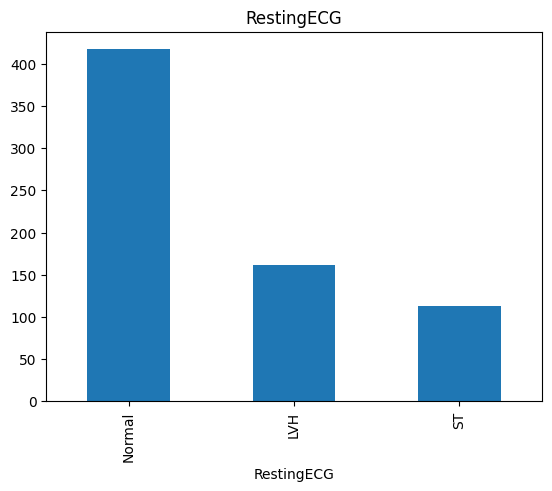

In [19]:
feature = categorical_features[2]
count = df_cleaned[feature].value_counts()
percent = 100*df_cleaned[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature)

* **RestingECG**: Kategori Normal memiliki frekuensi tertinggi, diikuti oleh kategori LVH dan ST. Ini menunjukkan hasil pemeriksaan EKG saat istirahat, di mana kategori tertentu lebih dominan dibandingkan lainnya.

                jumlah sampel  persentase
ExerciseAngina                           
N                         434        62.7
Y                         258        37.3


<Axes: title={'center': 'ExerciseAngina'}, xlabel='ExerciseAngina'>

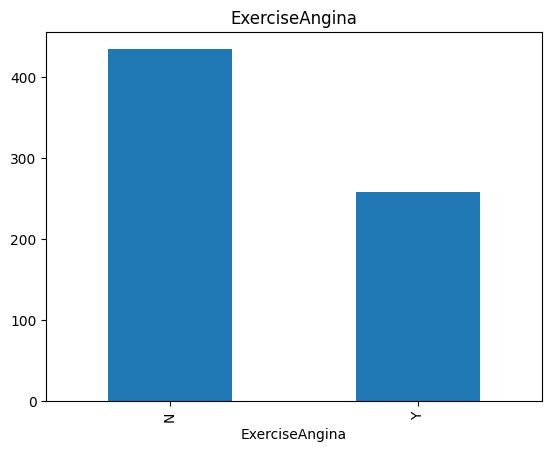

In [20]:
feature = categorical_features[3]
count = df_cleaned[feature].value_counts()
percent = 100*df_cleaned[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature)

* **ExerciseAngina**: Kategori N lebih tinggi daripada kategori Y, yang menunjukkan bahwa lebih banyak sampel yang tidak mengalami angina saat latihan dibandingkan yang mengalaminya.

          jumlah sampel  persentase
ST_Slope                           
Up                  334        48.3
Flat                326        47.1
Down                 32         4.6


<Axes: title={'center': 'ST_Slope'}, xlabel='ST_Slope'>

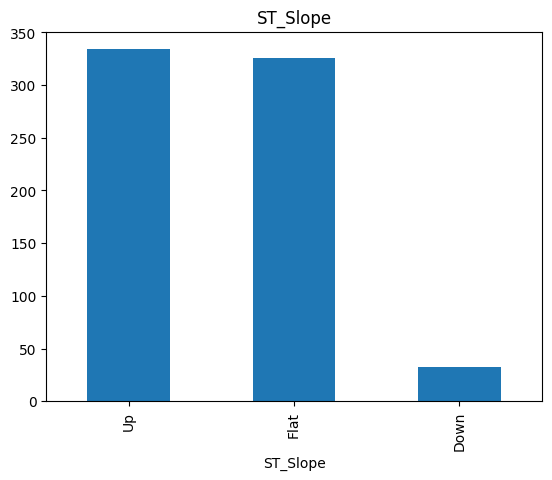

In [21]:
feature = categorical_features[4]
count = df_cleaned[feature].value_counts()
percent = 100*df_cleaned[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature)

* **ST_Slope**: Kategori Flat dan Down memiliki jumlah sampel yang hampir sama dan dominan, sementara kategori Up memiliki jumlah sampel yang jauh lebih sedikit. Ini menggambarkan pola kemiringan segmen ST setelah latihan.

### Numerical Features

3. Menampilkan plot numerik

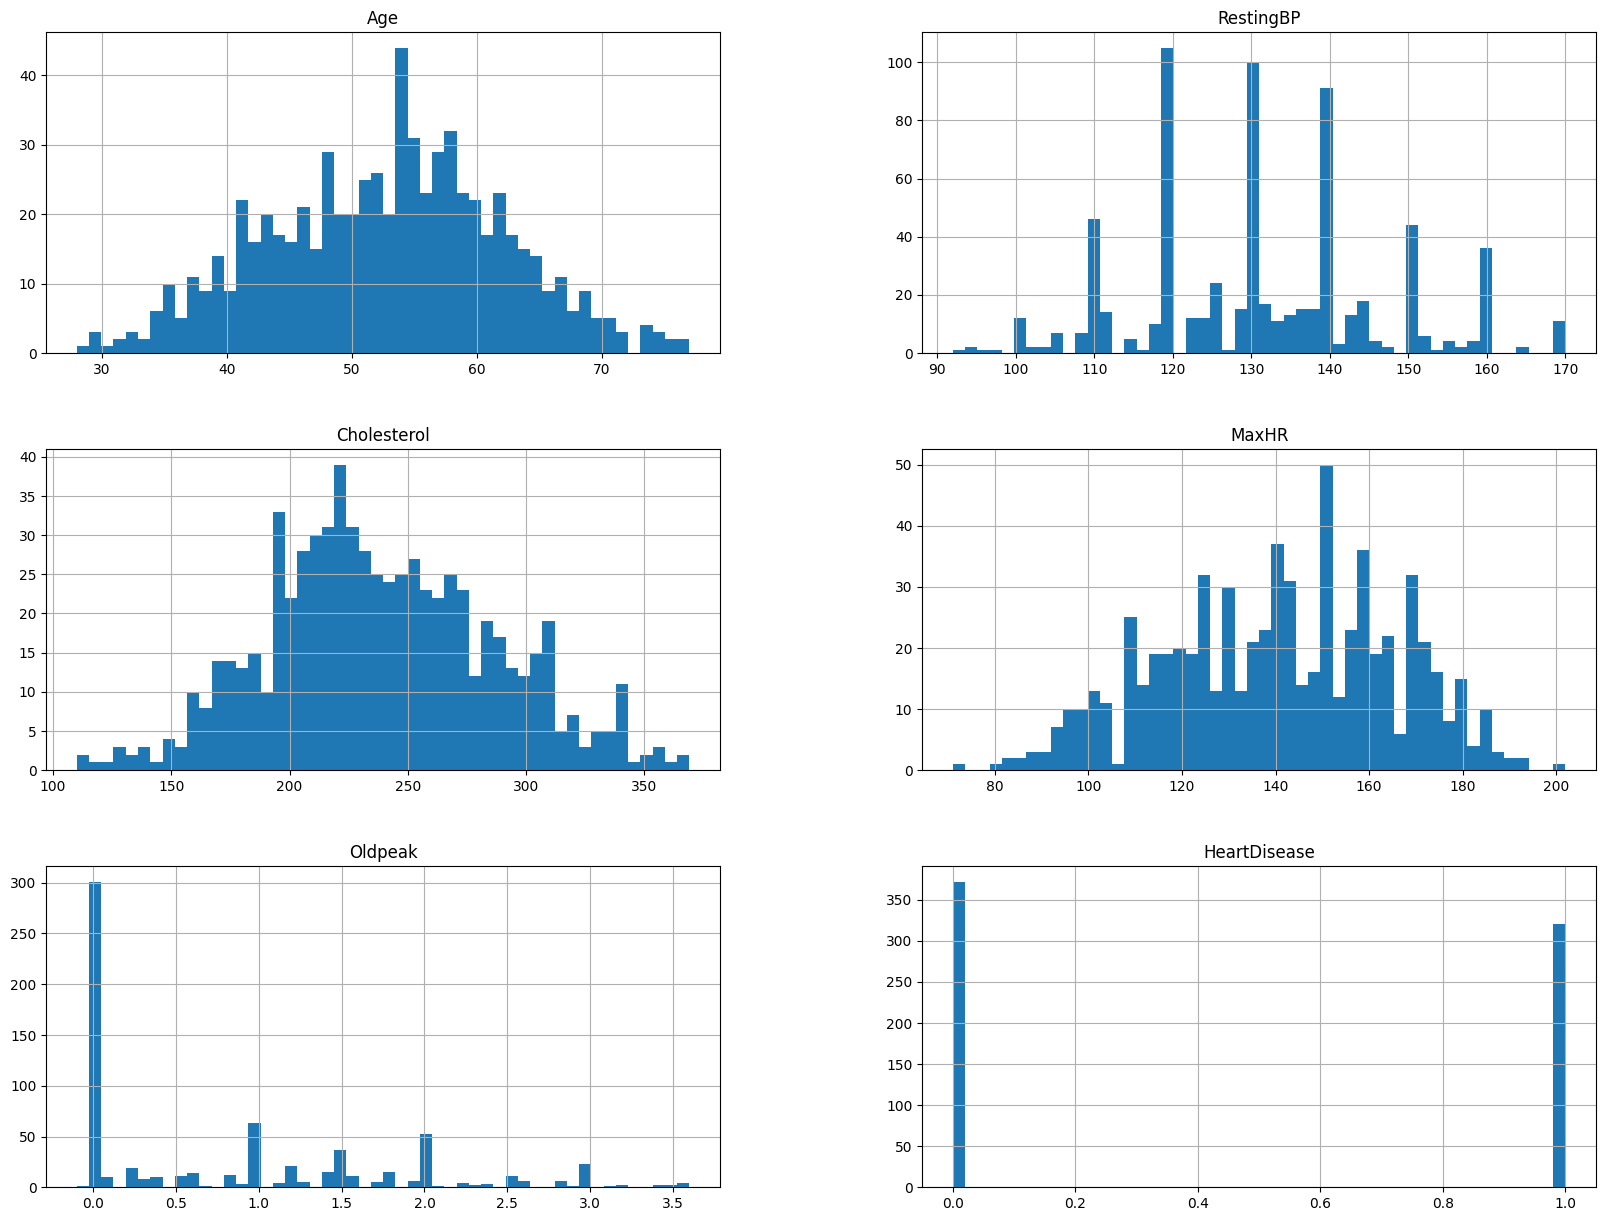

In [22]:
df_cleaned.hist(bins=50, figsize=(20,15))
plt.show()

## ***Multivariate Analysis***

1. Mengecek rata-rata terhadap masing-masing fitur untuk mengetahui pengaruh fitur kategori.

### Categorical Features

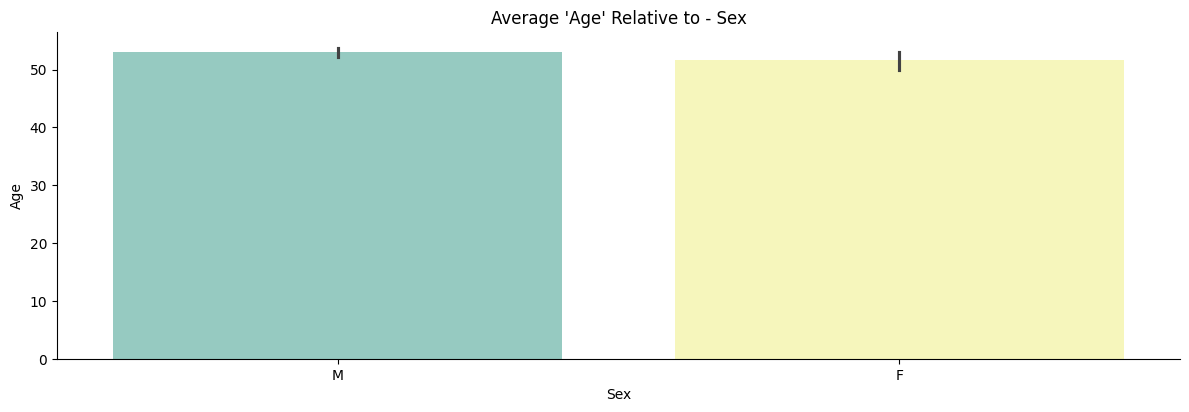

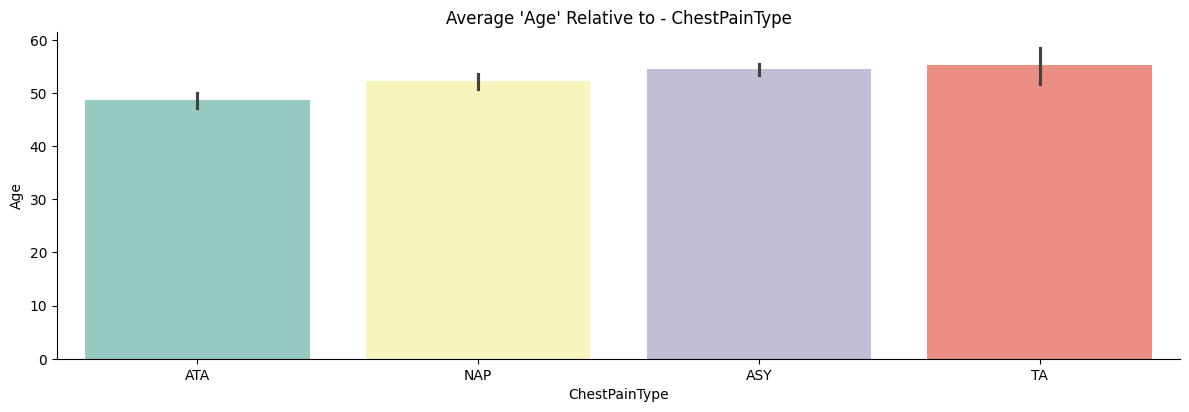

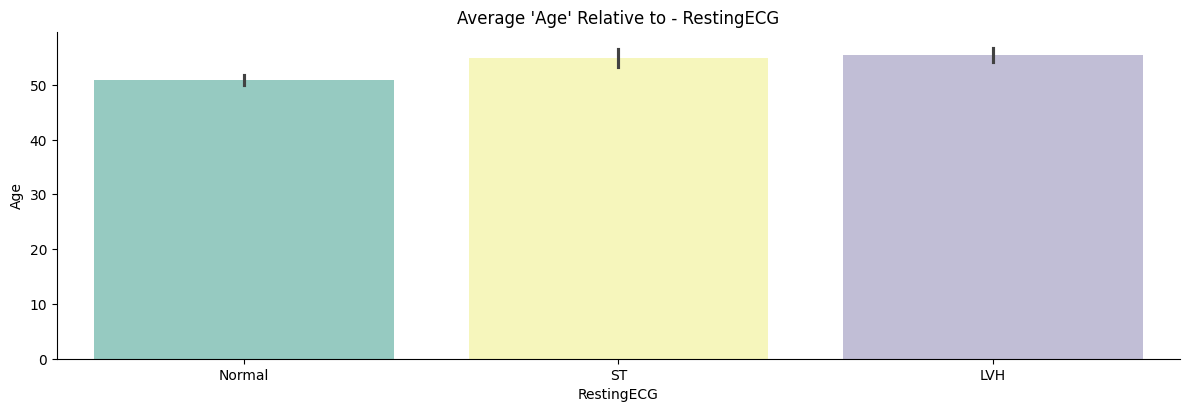

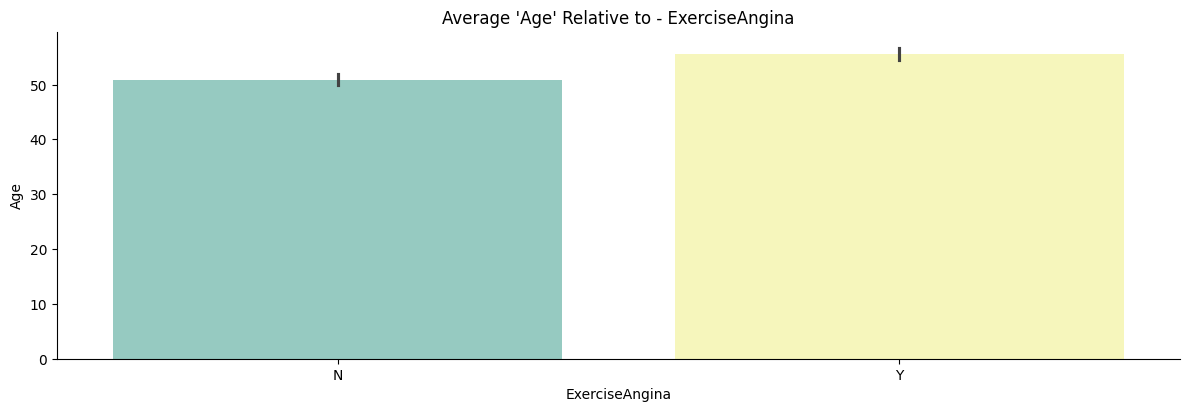

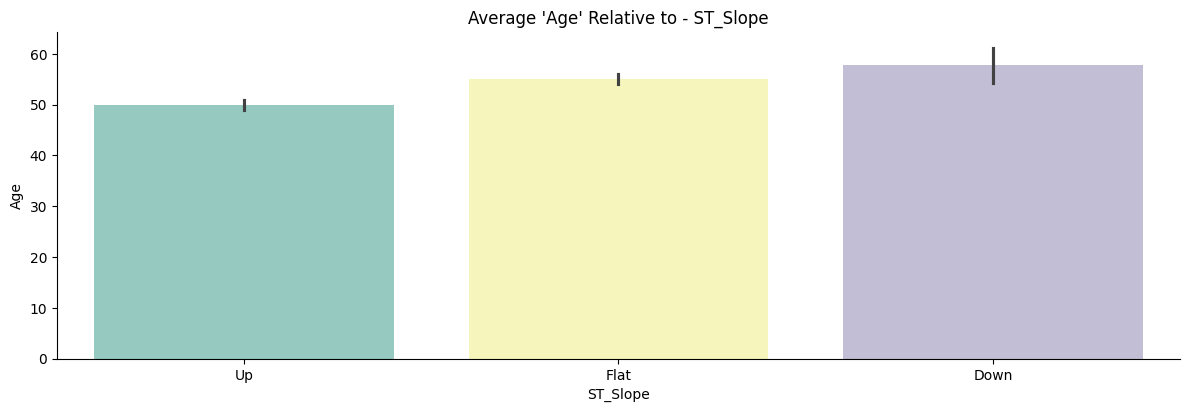

In [23]:
cat_features = df_cleaned.select_dtypes(include=['object']).columns.tolist()

for col in cat_features:
    sns.catplot(x=col, y="Age", kind="bar", dodge=False, height = 4, aspect = 3,  data=df_cleaned, palette="Set3")
    plt.title("Average 'Age' Relative to - {}".format(col))

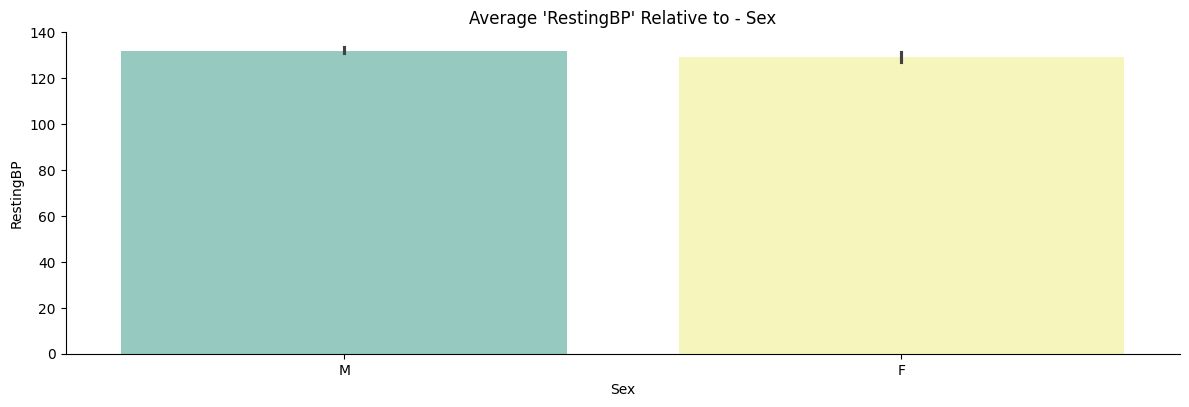

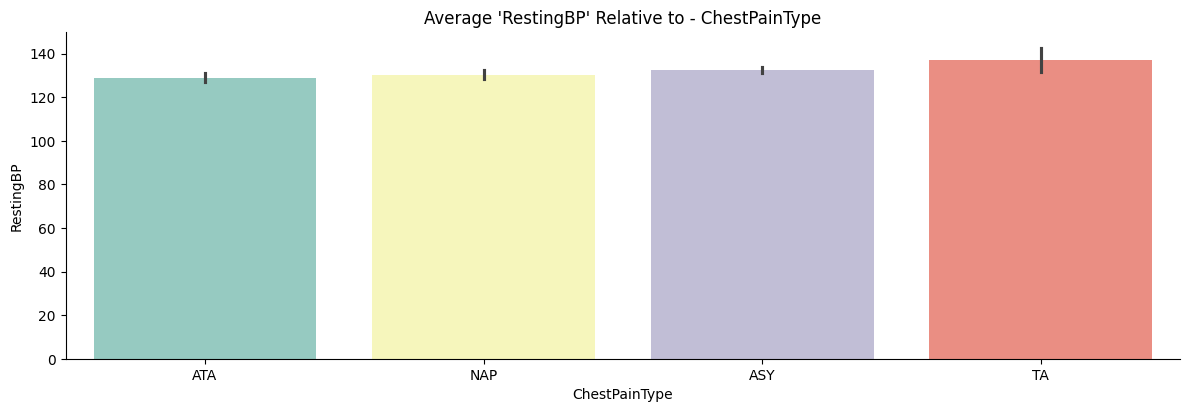

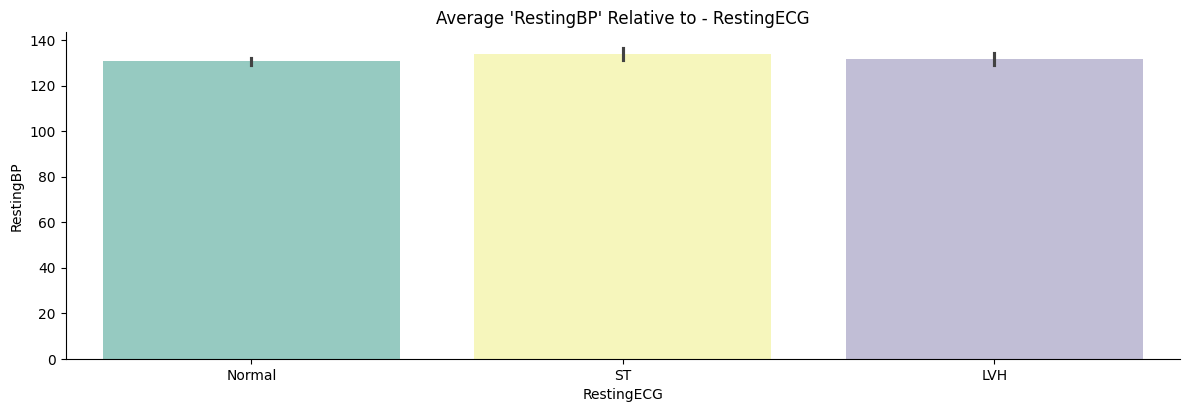

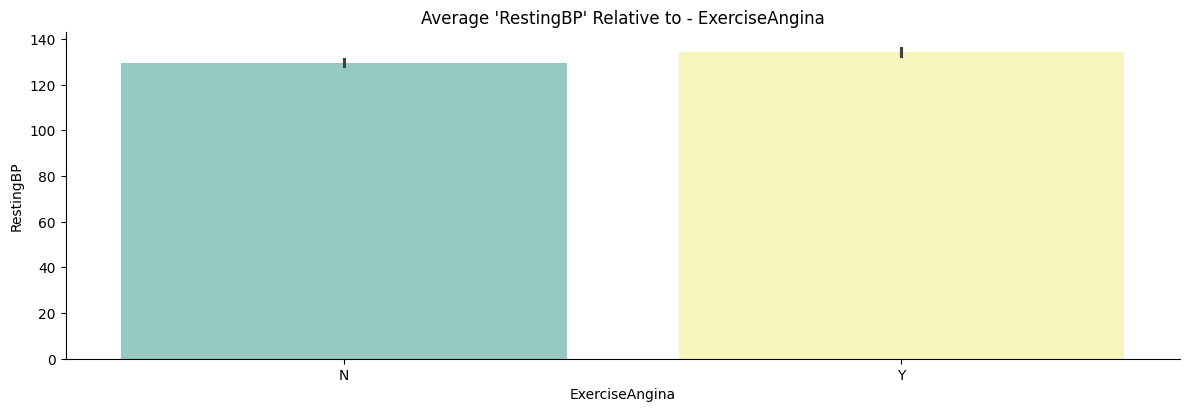

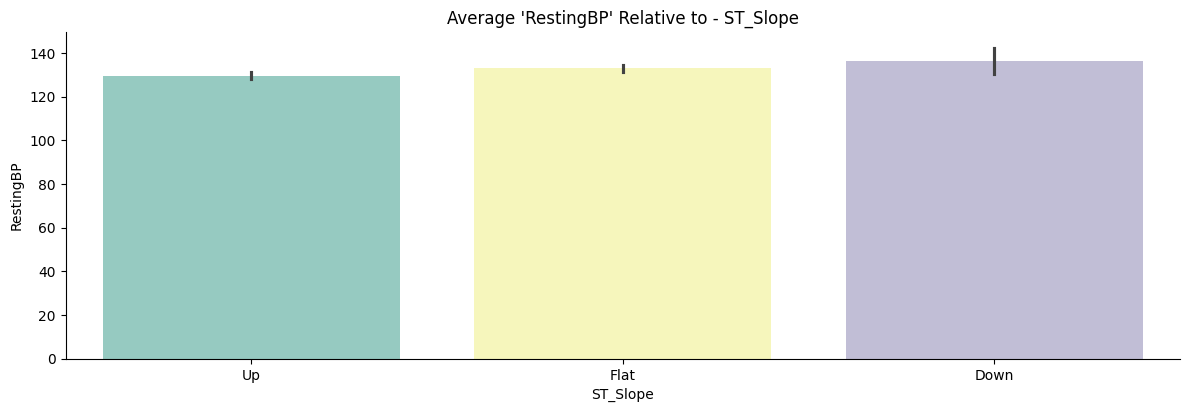

In [24]:
cat_features = df_cleaned.select_dtypes(include=['object']).columns.tolist()

for col in cat_features:
    sns.catplot(x=col, y="RestingBP", kind="bar", dodge=False, height = 4, aspect = 3,  data=df_cleaned, palette="Set3")
    plt.title("Average 'RestingBP' Relative to - {}".format(col))

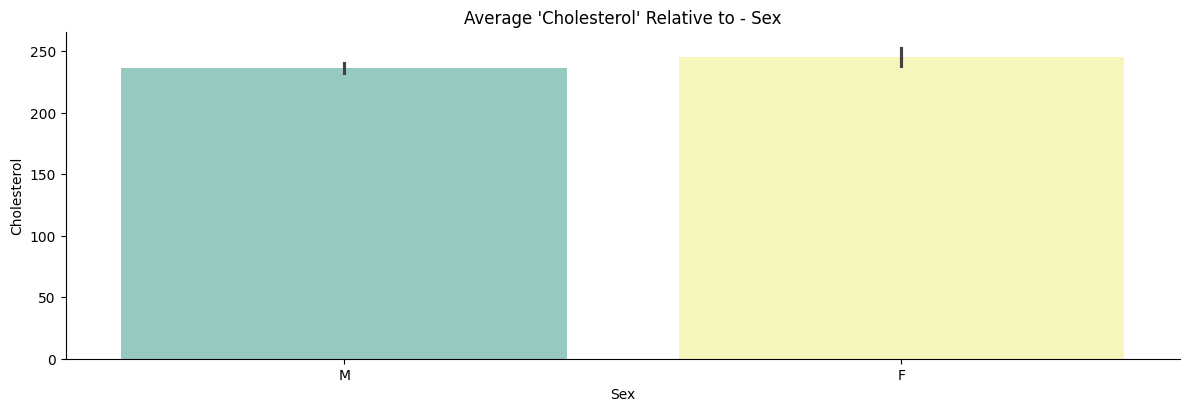

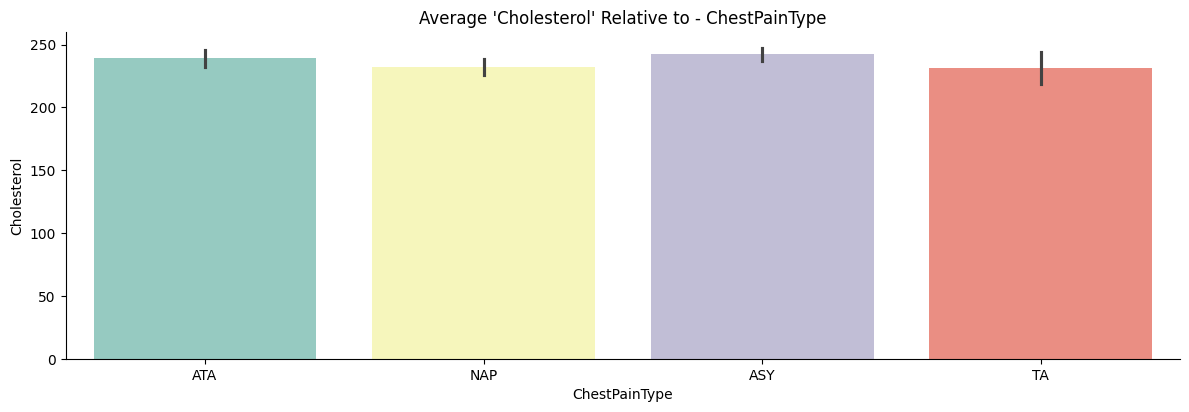

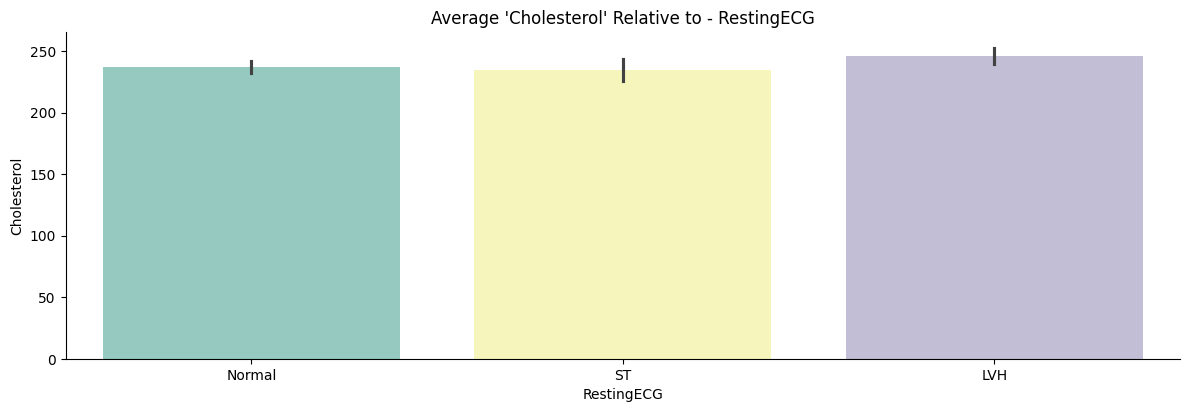

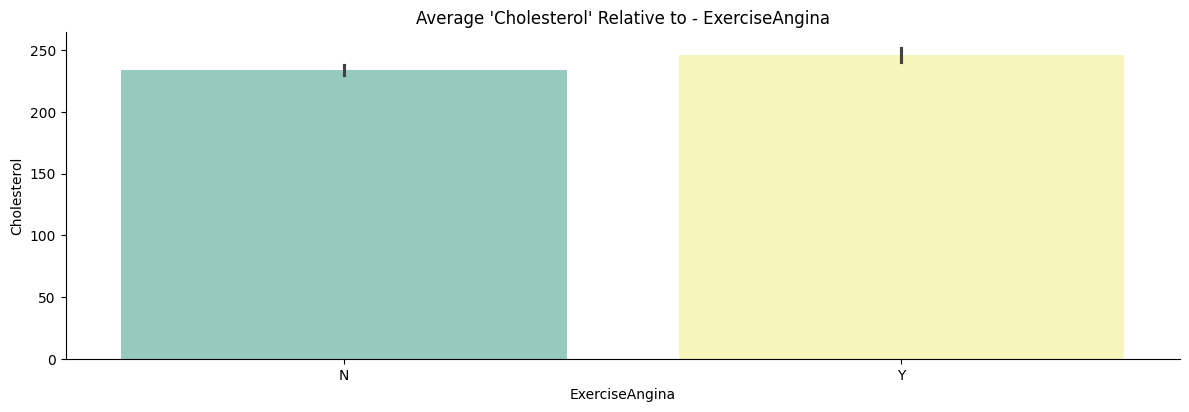

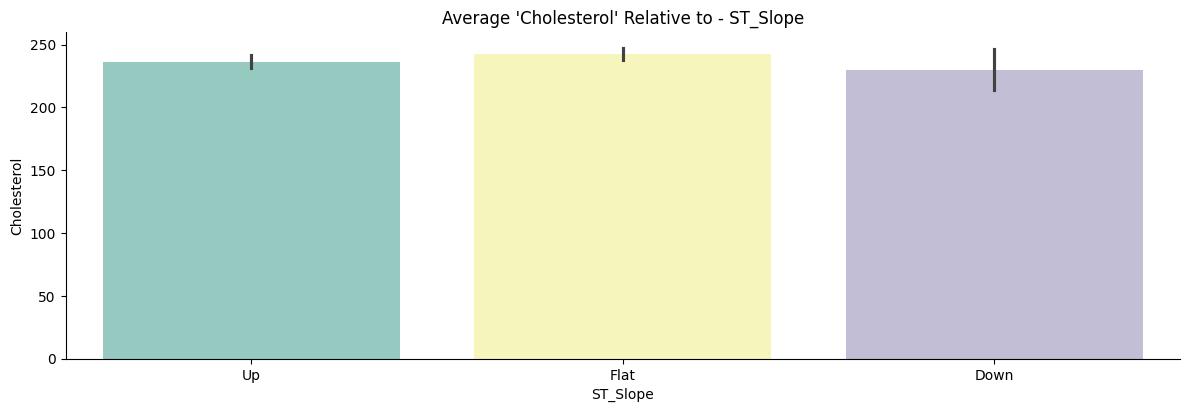

In [25]:
cat_features = df_cleaned.select_dtypes(include=['object']).columns.tolist()

for col in cat_features:
    sns.catplot(x=col, y="Cholesterol", kind="bar", dodge=False, height = 4, aspect = 3,  data=df_cleaned, palette="Set3")
    plt.title("Average 'Cholesterol' Relative to - {}".format(col))

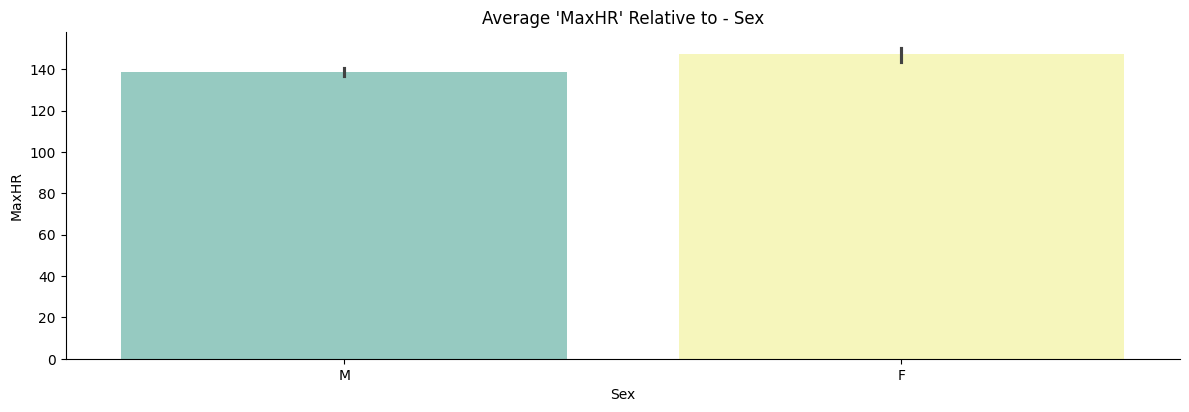

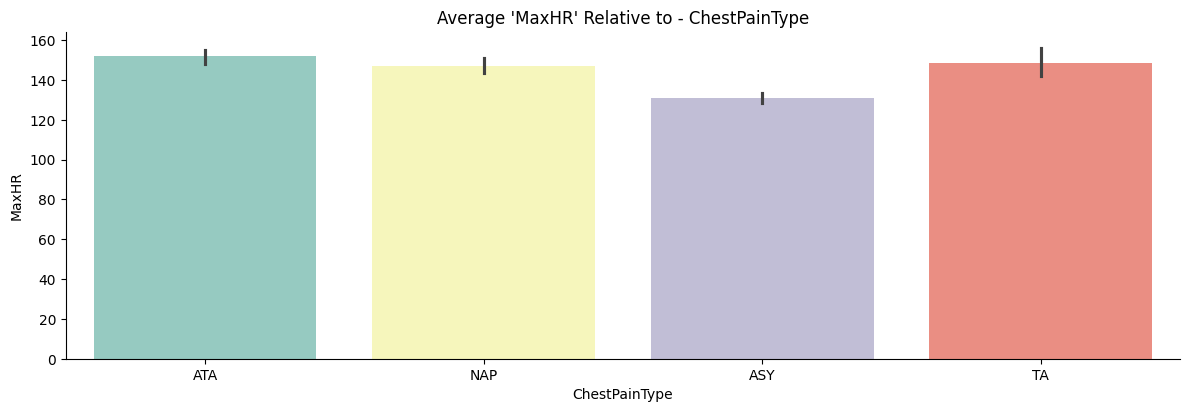

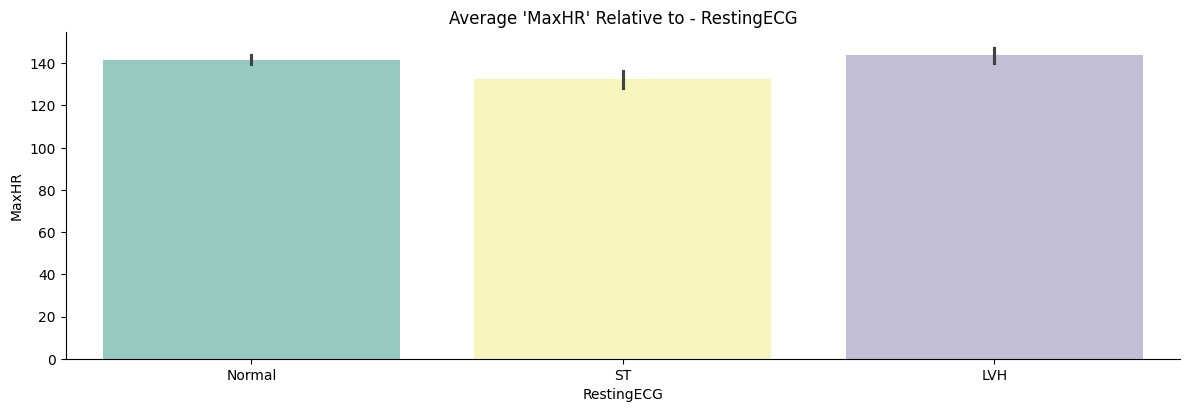

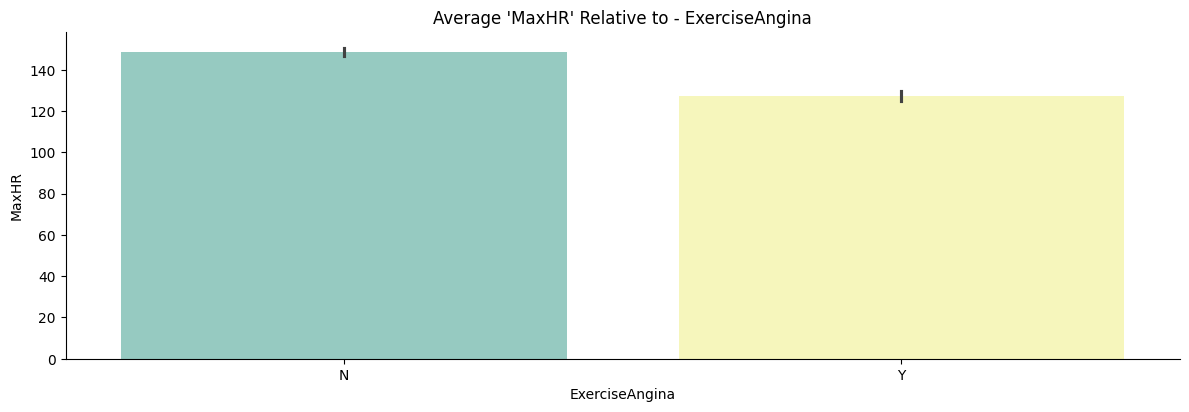

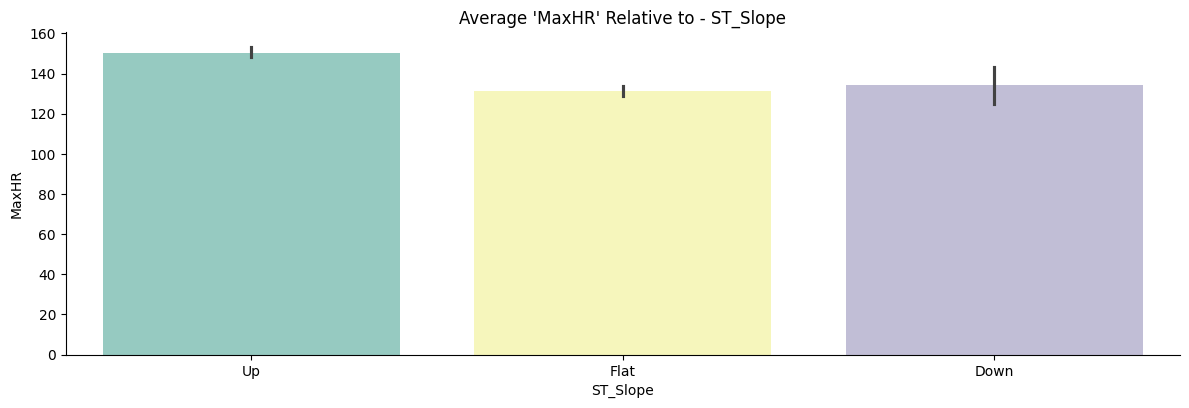

In [26]:
cat_features = df_cleaned.select_dtypes(include=['object']).columns.tolist()

for col in cat_features:
    sns.catplot(x=col, y="MaxHR", kind="bar", dodge=False, height = 4, aspect = 3,  data=df_cleaned, palette="Set3")
    plt.title("Average 'MaxHR' Relative to - {}".format(col))

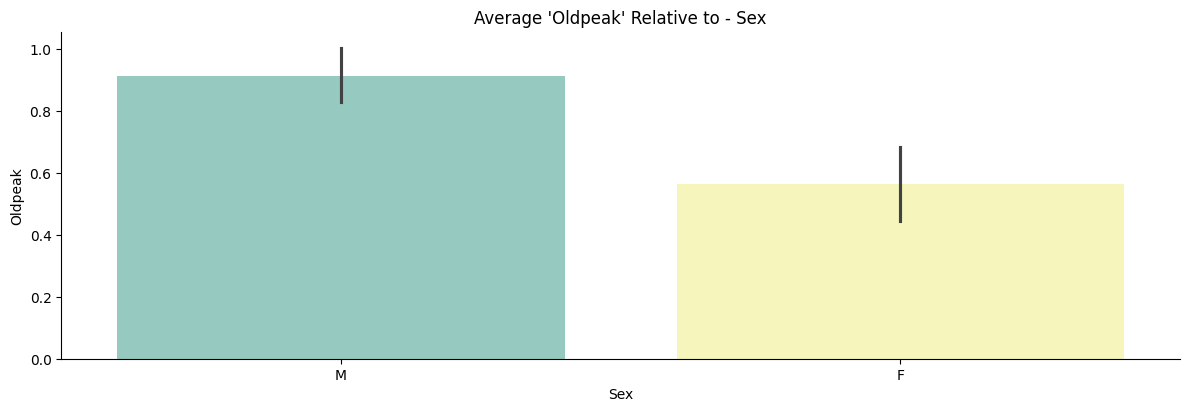

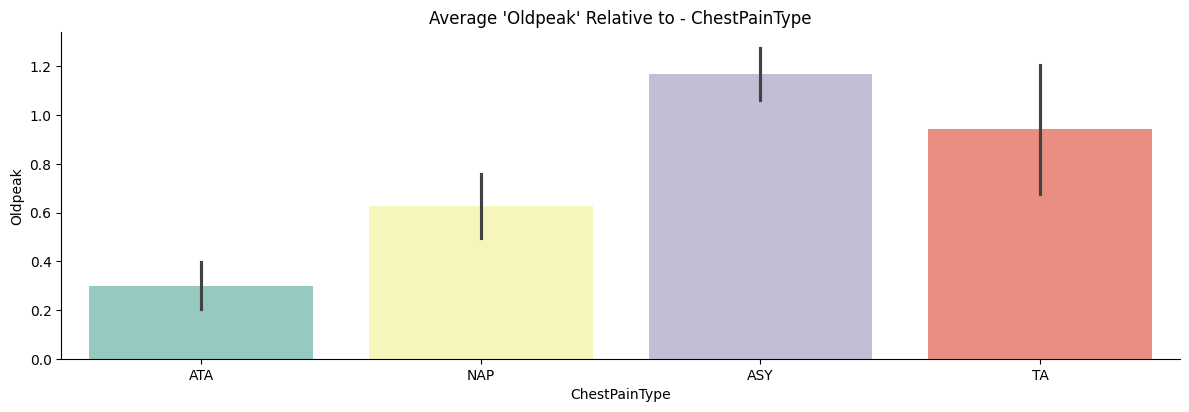

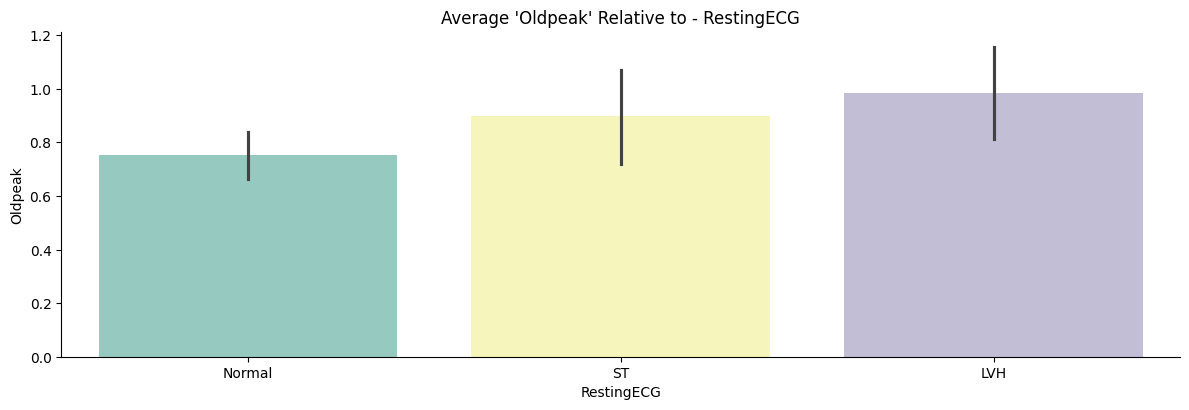

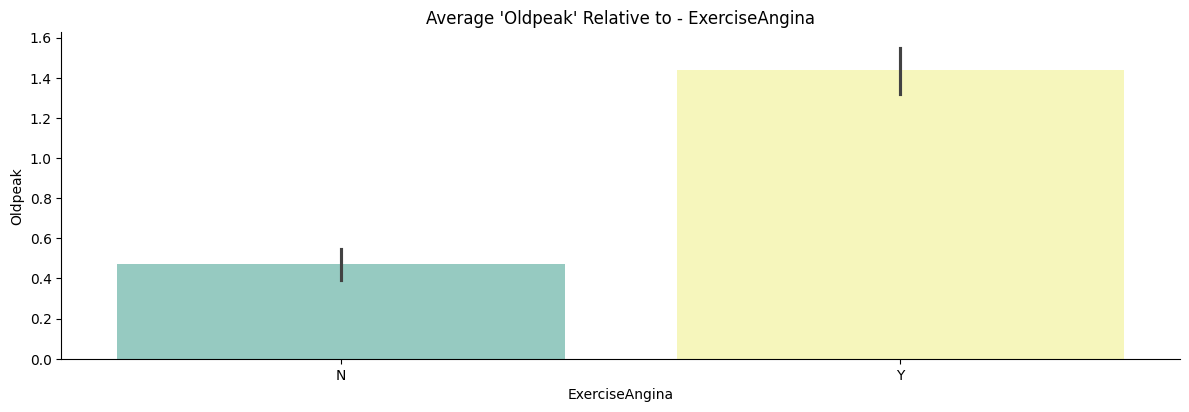

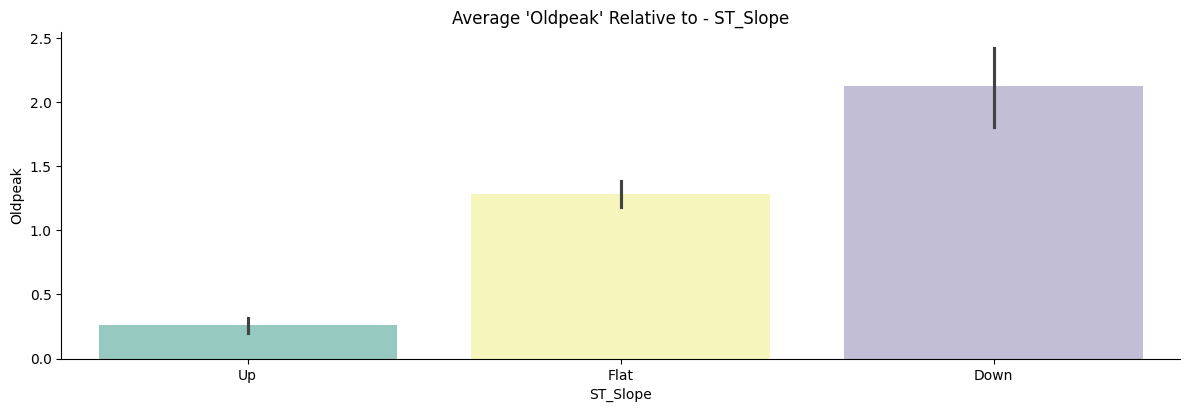

In [27]:
cat_features = df_cleaned.select_dtypes(include=['object']).columns.tolist()

for col in cat_features:
    sns.catplot(x=col, y="Oldpeak", kind="bar", dodge=False, height = 4, aspect = 3,  data=df_cleaned, palette="Set3")
    plt.title("Average 'Oldpeak' Relative to - {}".format(col))

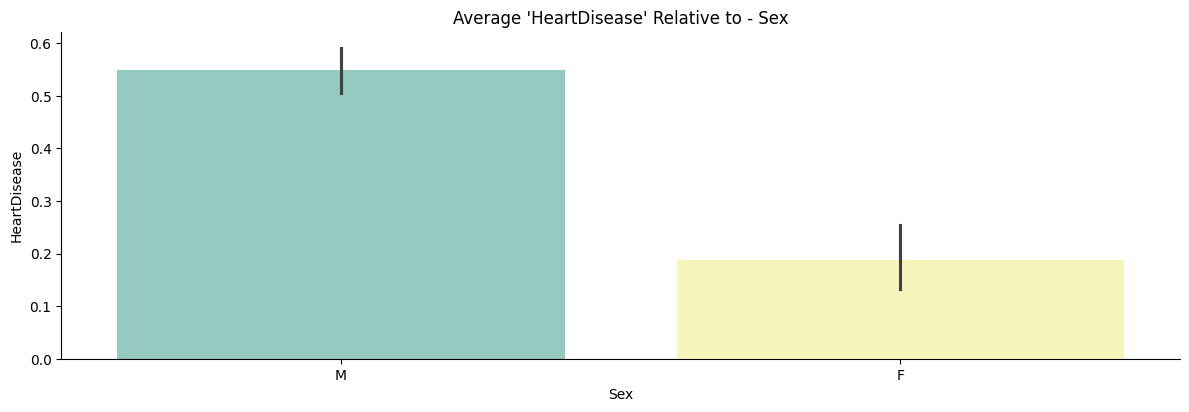

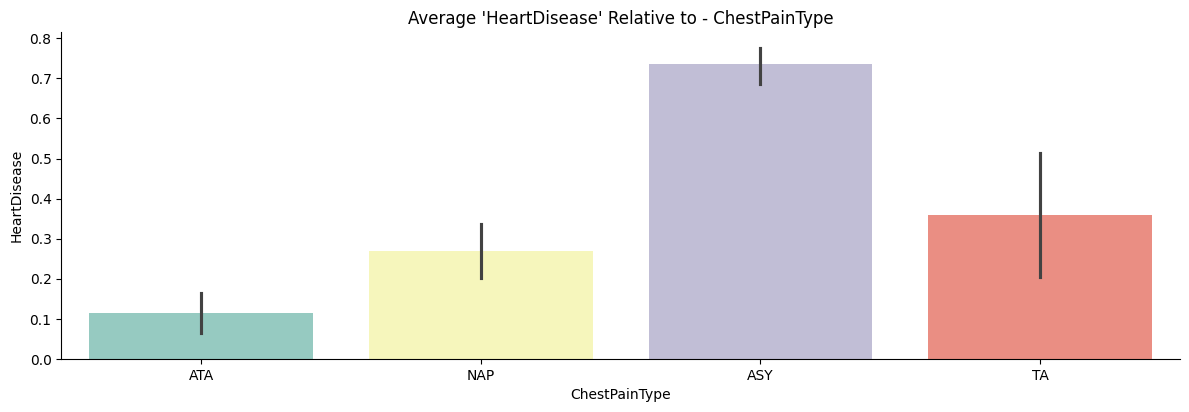

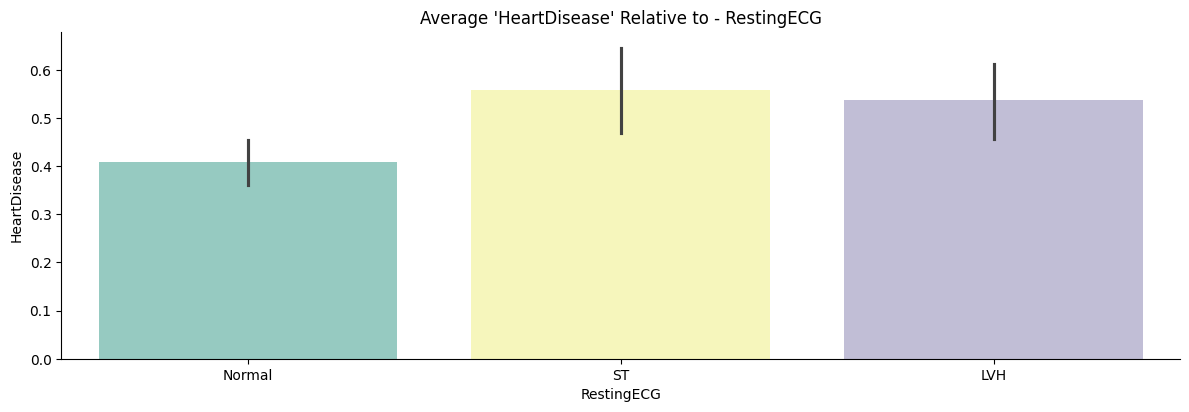

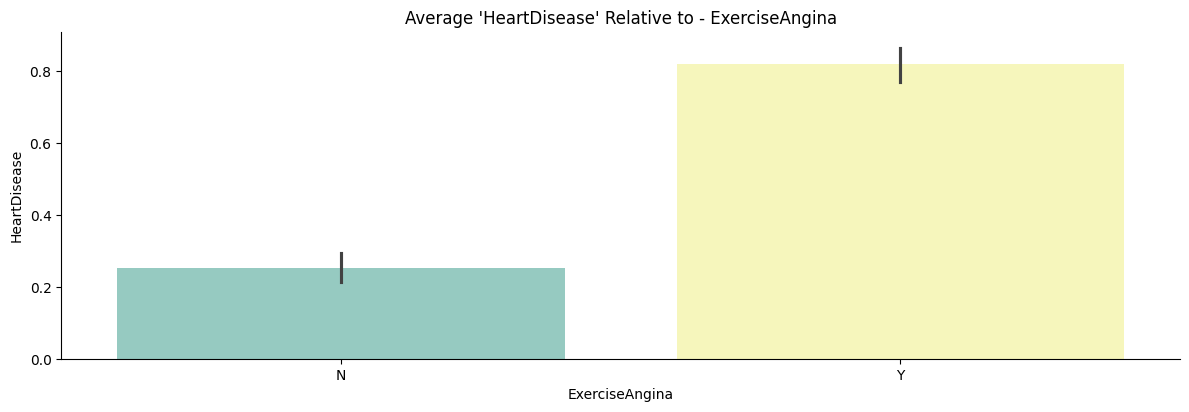

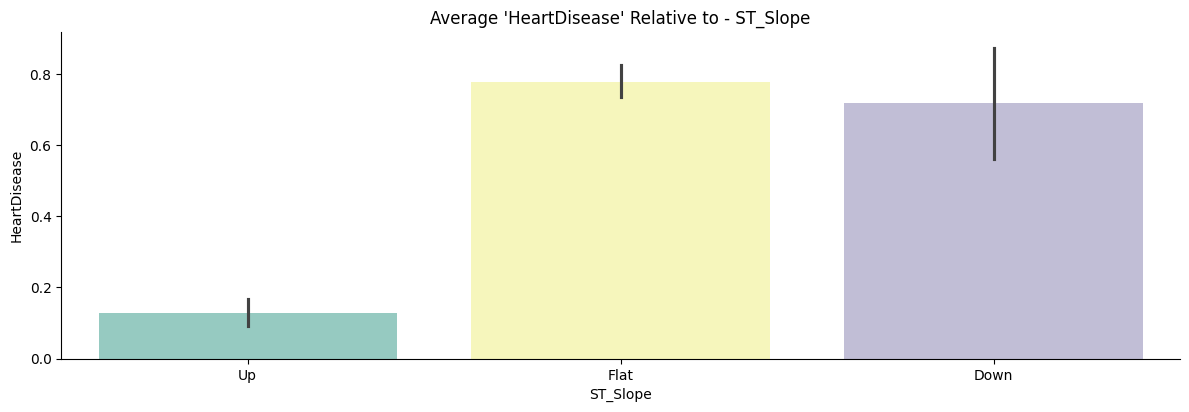

In [28]:
cat_features = df_cleaned.select_dtypes(include=['object']).columns.tolist()

for col in cat_features:
    sns.catplot(x=col, y="HeartDisease", kind="bar", dodge=False, height = 4, aspect = 3,  data=df_cleaned, palette="Set3")
    plt.title("Average 'HeartDisease' Relative to - {}".format(col))

### Numerical Features

2. Menampilkan hubungan fitur numerik.

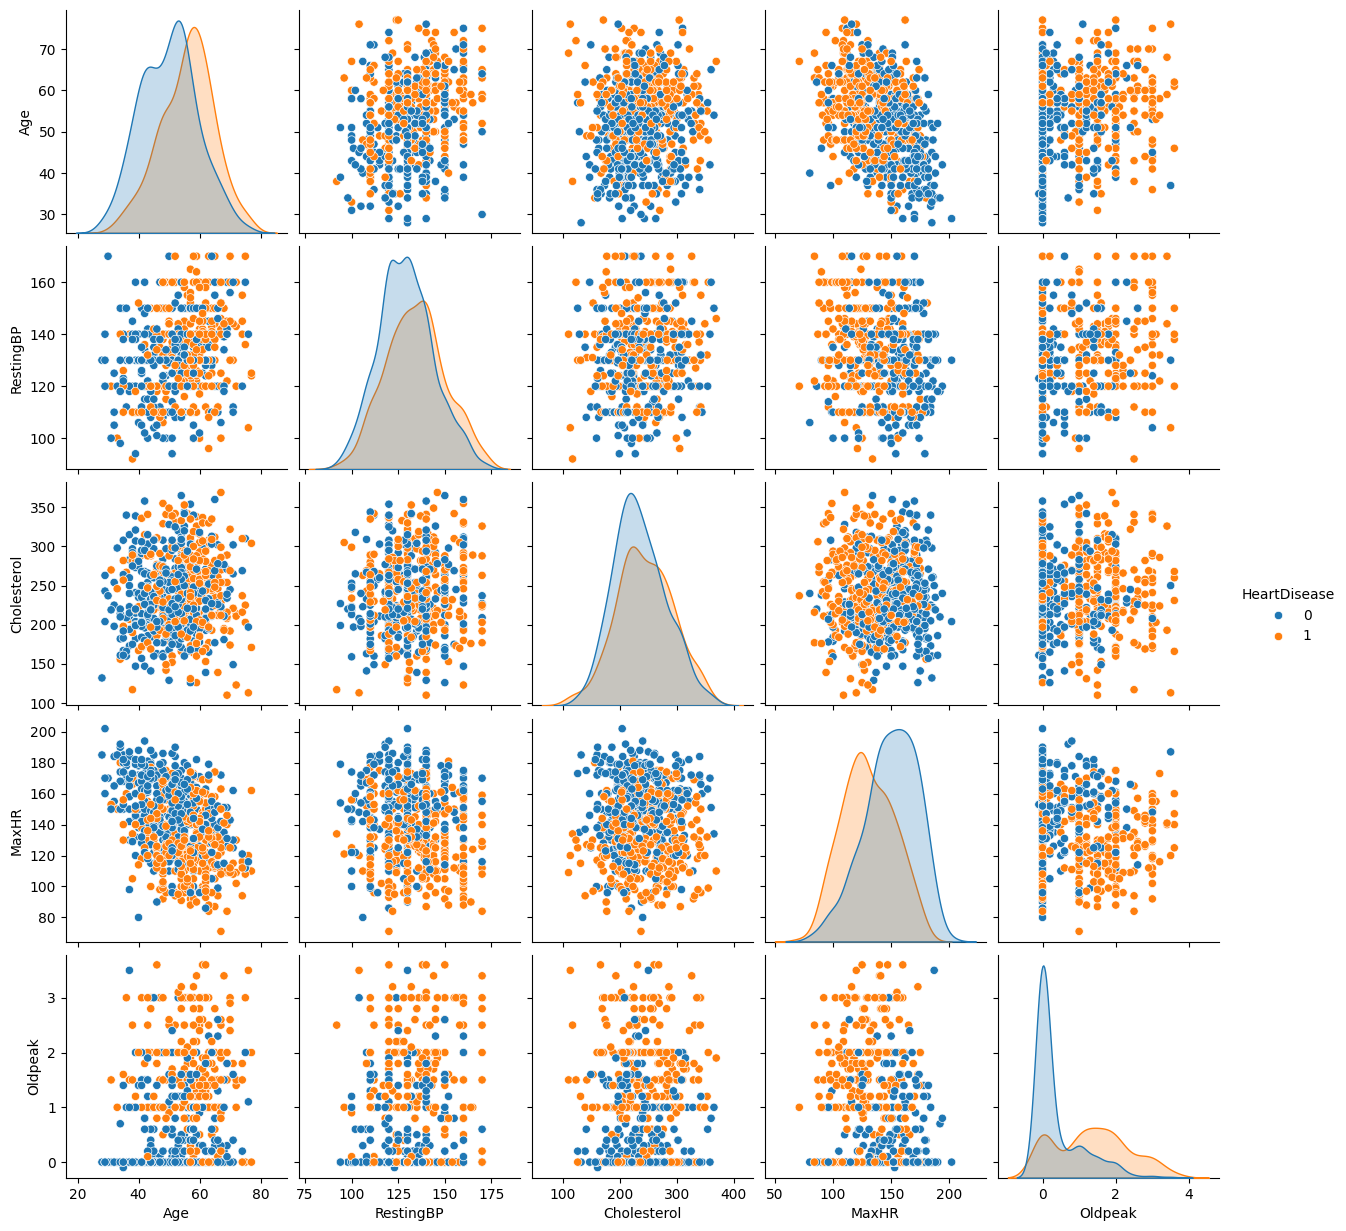

In [29]:
sns.pairplot(df_cleaned, hue = 'HeartDisease')
# sns.pairplot(df_cleaned, diag_kind = 'kde')

### Correlation Matrix

3. Menampikan korelasi

Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

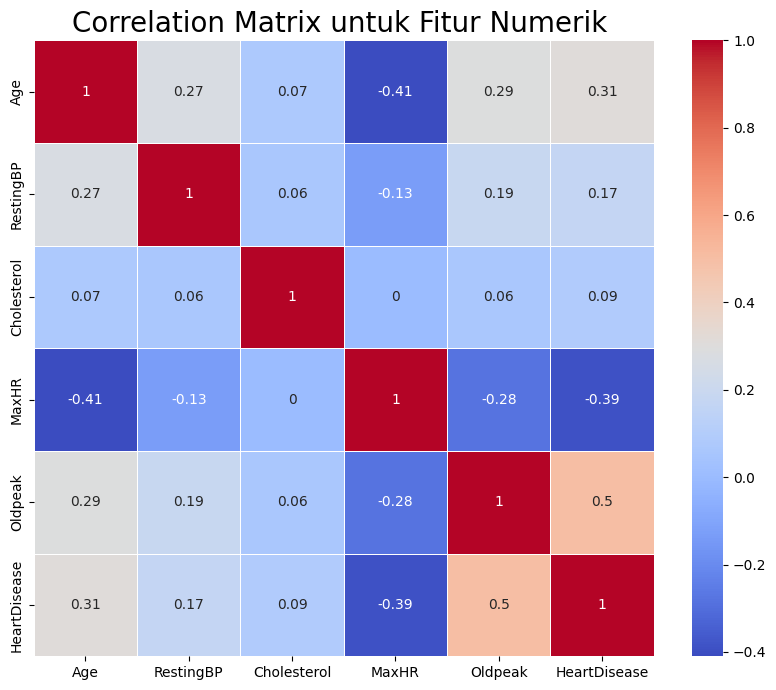

In [30]:
plt.figure(figsize=(10,8))
correlation_matrix = df_cleaned[numerical_features].corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)

Matriks korelasi ini menggambarkan seberapa kuat hubungan antara fitur-fitur numerik dalam dataset yang berkaitan dengan penyakit jantung. Mari kita lihat satu per satu dengan lebih sederhana:

1. **Umur (Age)**:
   - Ada hubungan positif dengan penyakit jantung (korelasi 0.31). Ini artinya, semakin tua seseorang, semakin besar kemungkinan dia punya penyakit jantung.
   - Ada juga hubungan negatif dengan `MaxHR` (detak jantung maksimal saat olahraga), sebesar -0.41. Ini berarti semakin tua seseorang, detak jantung maksimalnya cenderung lebih rendah.

2. **Tekanan Darah Istirahat (RestingBP)**:
   - Ada sedikit hubungan positif dengan penyakit jantung (0.17). Ini menunjukkan kalau tekanan darah istirahat yang lebih tinggi sedikit berhubungan dengan risiko penyakit jantung.
   - Tekanan darah juga ada hubungannya dengan usia (0.27), jadi semakin tua, biasanya tekanan darah istirahat bisa naik sedikit.

3. **Kolesterol**:
   - Fitur ini hampir tidak ada hubungannya dengan penyakit jantung (korelasi cuma 0.09). Jadi, kadar kolesterol di dataset ini mungkin bukan faktor utama untuk menentukan risiko penyakit jantung.
   - Hubungan dengan fitur lain juga sangat lemah, jadi kolesterol tampaknya kurang berpengaruh dalam kasus ini.

4. **Detak Jantung Maksimal (MaxHR)**:
   - Ada hubungan negatif dengan penyakit jantung (-0.39). Artinya, detak jantung maksimal yang lebih rendah cenderung dihubungkan dengan risiko penyakit jantung yang lebih tinggi.
   - Juga ada hubungan negatif dengan umur (-0.41), yang menunjukkan bahwa seiring bertambahnya usia, detak jantung maksimal kita biasanya menurun.

5. **Oldpeak (Penurunan ST setelah olahraga)**:
   - Ini fitur yang punya hubungan paling kuat dengan penyakit jantung (0.5). Jadi, semakin tinggi penurunan ST ini, makin besar peluang seseorang mengalami penyakit jantung.
   - Oldpeak juga ada hubungannya dengan `MaxHR` (-0.28), menunjukkan bahwa nilai Oldpeak cenderung lebih tinggi kalau detak jantung maksimal menurun.

Secara keseluruhan, fitur yang paling berpengaruh terhadap penyakit jantung adalah `Oldpeak`, diikuti oleh `MaxHR` dan `Umur`, sementara fitur seperti `Kolesterol` kelihatannya tidak terlalu berpengaruh di sini.

# **Data Preparation**

## ***Category Feature Encoding***

In [31]:
df_cleaned = pd.concat([df_cleaned, pd.get_dummies(df_cleaned['Sex'], prefix='Sex', dtype='int')], axis=1)
df_cleaned = pd.concat([df_cleaned, pd.get_dummies(df_cleaned['ChestPainType'], prefix='ChestPainType', dtype='int')], axis=1)
df_cleaned = pd.concat([df_cleaned, pd.get_dummies(df_cleaned['RestingECG'], prefix='RestingECG', dtype='int')], axis=1)
df_cleaned = pd.concat([df_cleaned, pd.get_dummies(df_cleaned['ExerciseAngina'], prefix='ExerciseAngina', dtype='int')], axis=1)
df_cleaned = pd.concat([df_cleaned, pd.get_dummies(df_cleaned['ST_Slope'], prefix='ST_Slope', dtype='int')], axis=1)
df_cleaned.drop(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], axis=1, inplace=True)
df_cleaned.head()

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,172,0.0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1
1,49,160,180,156,1.0,1,1,0,0,0,1,0,0,1,0,1,0,0,1,0
2,37,130,283,98,0.0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,1
3,48,138,214,108,1.5,1,1,0,1,0,0,0,0,1,0,0,1,0,1,0
4,54,150,195,122,0.0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1


In [32]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 692 entries, 0 to 917
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                692 non-null    int64  
 1   RestingBP          692 non-null    int64  
 2   Cholesterol        692 non-null    int64  
 3   MaxHR              692 non-null    int64  
 4   Oldpeak            692 non-null    float64
 5   HeartDisease       692 non-null    int64  
 6   Sex_F              692 non-null    int64  
 7   Sex_M              692 non-null    int64  
 8   ChestPainType_ASY  692 non-null    int64  
 9   ChestPainType_ATA  692 non-null    int64  
 10  ChestPainType_NAP  692 non-null    int64  
 11  ChestPainType_TA   692 non-null    int64  
 12  RestingECG_LVH     692 non-null    int64  
 13  RestingECG_Normal  692 non-null    int64  
 14  RestingECG_ST      692 non-null    int64  
 15  ExerciseAngina_N   692 non-null    int64  
 16  ExerciseAngina_Y   692 non-null

## ***Train Test Spilt***

* Split dataset menjadi data train dan data test sebelum transformasi (supaya transformasi diterapkan hanya pada data latih)

In [33]:
X = df_cleaned.drop(["HeartDisease"],axis =1)
y = df_cleaned["HeartDisease"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 692
Total # of sample in train dataset: 553
Total # of sample in test dataset: 139


## ***Standardization***

* Standarisasi fitur dengan cara mengurangi setiap nilai pada kumpulan data dengan nilai rata-rata, kemudian dibagi dengan deviasi standar. Standarisasi ditujukan supaya data tidak memiliki penyimpangan nilai yang besar.

In [34]:
num_features = ['Age','RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

scaler = StandardScaler()
scaler.fit(X_train[num_features])
X_train[num_features] = scaler.transform(X_train.loc[:, num_features])
X_train[num_features].head()

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak
783,-0.775810,0.442737,-0.043137,0.444562,-0.640817
257,-1.725911,1.227042,-1.637668,1.267880,-0.844655
131,-0.670244,-1.387307,-0.756480,0.362230,-0.844655
420,1.441091,-1.387307,-0.525693,-1.737231,0.480290
738,1.335524,1.880629,2.558464,0.403396,-0.029304


In [35]:
num_features = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
X_train[num_features].describe().round(4)

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak
count,553.0000,553.0000,553.0000,553.0000,553.0000
mean,0.0000,0.0000,-0.0000,-0.0000,0.0000
std,1.0009,1.0009,1.0009,1.0009,1.0009
min,-2.5704,-2.5638,-2.6867,-2.5194,-0.9466
25%,-0.6702,-0.7337,-0.6935,-0.7492,-0.8447
50%,0.0687,-0.0801,-0.0851,0.0329,-0.5389
75%,0.7021,0.5735,0.6492,0.7739,0.6841
max,2.6023,2.5342,2.7473,2.5029,2.8244


Perhatikan tabel di atas, sekarang nilai mean = 0 dan standar deviasi = 1.

# **Model Development**

1. Menyiapkan dataframe untuk analisis model

In [36]:
models = pd.DataFrame(index=['train_mse', 'test_mse'],
                      columns=['KNN', 'RandomForest', 'Boosting'])

## ***Model Development with K-Nearest Neighbor***

In [37]:
knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train, y_train)

models.loc['train_mse','KNN'] = mean_squared_error(y_pred=knn.predict(X_train), y_true=y_train)

## ***Model Development with Random Forest***

In [38]:
RF = RandomForestRegressor(n_estimators=50, max_depth=16, random_state=55, n_jobs=-1)
RF.fit(X_train, y_train)

models.loc['train_mse','RandomForest'] = mean_squared_error(y_pred=RF.predict(X_train), y_true=y_train)

## ***Model Development with Boosting Algorithm***

In [39]:
boosting = AdaBoostRegressor(learning_rate=0.05, random_state=55)
boosting.fit(X_train, y_train)
models.loc['train_mse','Boosting'] = mean_squared_error(y_pred=boosting.predict(X_train), y_true=y_train)

## ***Pengujian Model Development***

In [40]:
knn_pred = knn.predict(X_test)
RF_pred = RF.predict(X_test)
boosting_pred = boosting.predict(X_test)

# **Model Evaluation**

In [41]:
X_test.loc[:, num_features] = scaler.transform(X_test[num_features])

In [42]:
# Buat variabel mse yang isinya adalah dataframe nilai mse data train dan test pada masing-masing algoritma
mse = pd.DataFrame(columns=['train', 'test'], index=['KNN','RF','Boosting'])

# Buat dictionary untuk setiap algoritma yang digunakan
model_dict = {'KNN': knn, 'RF': RF, 'Boosting': boosting}

# Hitung Mean Squared Error masing-masing algoritma pada data train dan test
for name, model in model_dict.items():
    mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))
    mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))

# Panggil mse
mse

,train,test
KNN,0.092514,0.096475
RF,0.017173,0.103283
Boosting,0.090708,0.094023


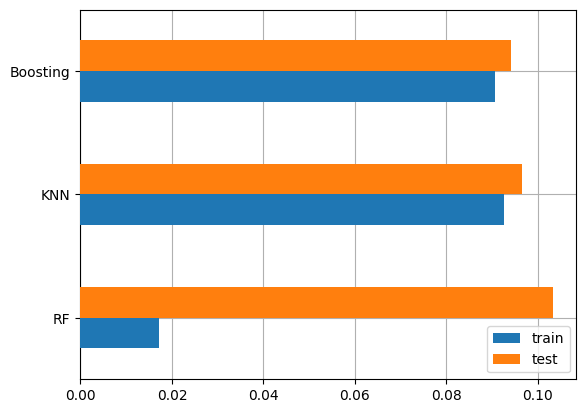

In [43]:
fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

Grafik di atas menunjukkan perbandingan performa tiga model prediksi: **Boosting**, **Random Forest (RF)**, dan **K-Nearest Neighbors (KNN)**. Nilai yang dibandingkan adalah **Mean Squared Error (MSE)**—semakin kecil MSE, semakin akurat prediksi model tersebut.

Berikut penjelasan untuk setiap model:

1. **Boosting**  
   - Nilai kesalahan (MSE) pada data latih (*train set*) lebih rendah daripada pada data uji (*test set*), tapi perbedaannya tidak terlalu jauh.  
   - Ini menunjukkan model cukup mampu memahami pola data dan **tidak mengalami overfitting** (yaitu kondisi di mana model terlalu baik di data latih tapi buruk di data baru).

2. **Random Forest (RF)**  
   - MSE di data latih sangat rendah, tapi di data uji jauh lebih tinggi.  
   - Ini menandakan model mengalami **overfitting**—terlalu baik di data latih tapi kesulitan menangani data baru.

3. **KNN (K-Nearest Neighbors)**  
   - MSE cukup tinggi di kedua data (latih dan uji).  
   - Ini menunjukkan model kurang cocok untuk dataset ini atau mungkin terlalu sederhana untuk menangkap pola yang ada.

In [44]:
prediksi = X_test.iloc[:1].copy()
pred_dict = {'HeartDisease':y_test[:1]}
for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi).round(1)

pd.DataFrame(pred_dict)

,HeartDisease,prediksi_KNN,prediksi_RF,prediksi_Boosting
629,0,0.4,0.8,0.5


Hasil prediksi yang paling mendekati nilai asli didapatkan oleh algoritma KNN.